In [2]:
import sys
from scipy.io import loadmat, savemat
from math import pi

import matplotlib.pyplot as plt
import torch
import torchaudio

%load_ext autoreload
%autoreload 2
%matplotlib inline

from dstft import DSTFT, FDSTFT

device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(1802);

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


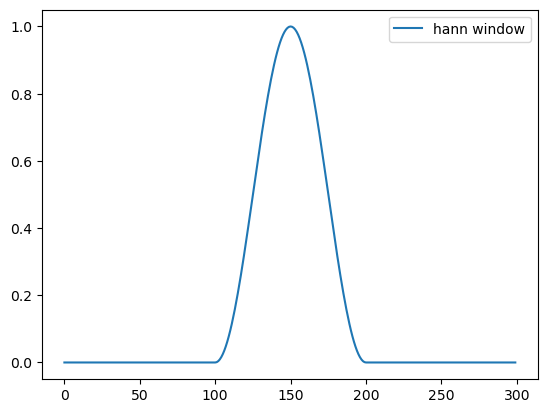

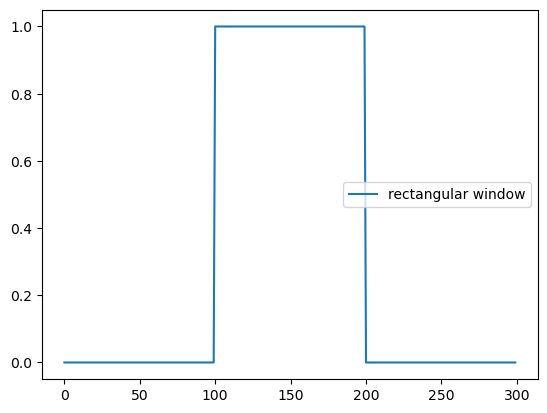

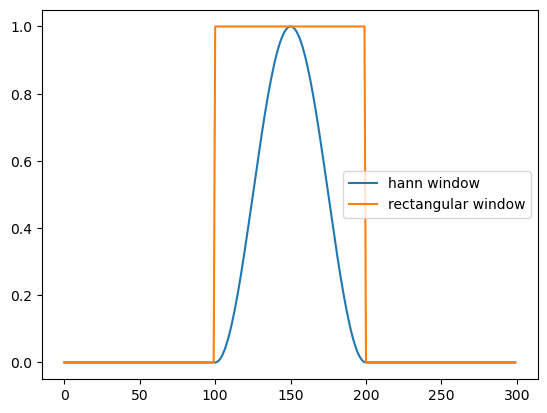

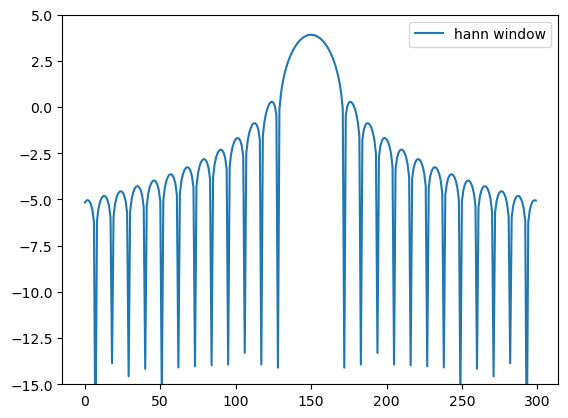

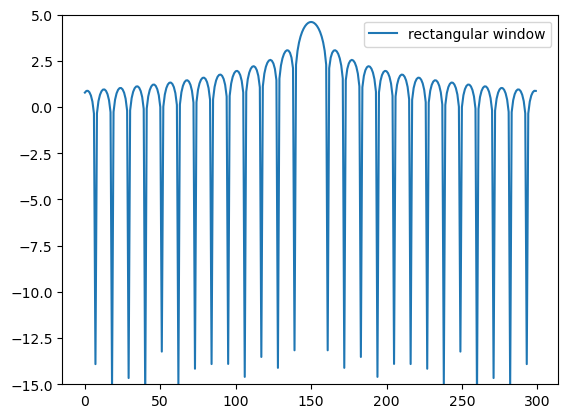

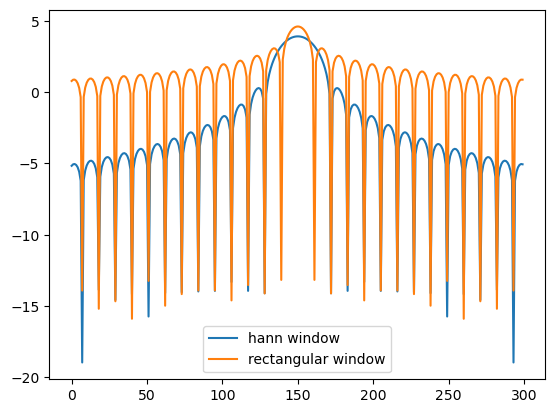

In [3]:
N = 100
P = 500
hann = torch.nn.functional.pad(
    torch.hann_window(N), (P, P), mode='constant', value=0
)
rect = torch.zeros_like(hann)
rect[len(hann) // 2 - N // 2 : len(hann) // 2 + N // 2] = 1
plt.plot(hann[400:700], label='hann window')
plt.legend()
plt.figure()
plt.plot(rect[400:700], label='rectangular window')
plt.legend()
plt.figure()
plt.plot(hann[400:700], label='hann window')
plt.plot(rect[400:700], label='rectangular window')
plt.legend()

plt.figure()
plt.plot(
    torch.fft.fftshift(torch.fft.fft(hann)).abs().log()[400:700],
    label='hann window',
)
plt.ylim(-15, 5)
plt.legend()
plt.figure()
plt.plot(
    torch.fft.fftshift(torch.fft.fft(rect)).abs().log()[400:700],
    label='rectangular window',
)
plt.ylim(-15, 5)
plt.legend()
plt.figure()
plt.plot(
    torch.fft.fftshift(torch.fft.fft(hann)).abs().log()[400:700],
    label='hann window',
)
plt.plot(
    torch.fft.fftshift(torch.fft.fft(rect)).abs().log()[400:700],
    label='rectangular window',
)
plt.legend();

torch.Size([1, 1000]) cpu torch.float32


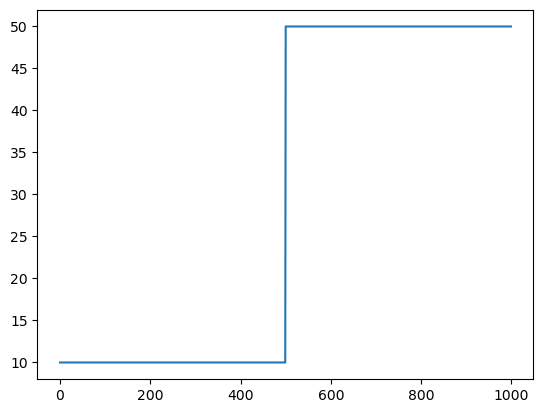

In [4]:
sr = 200
size = 500
f = torch.cat((10 * torch.ones(size), 50 * torch.ones(size)))
x = torch.sin(2 * pi * torch.cumsum(f, 0) / sr)  # + 0.05*torch.randn_like(f)
x = x[None, :].to(device)
print(x.shape, x.device, x.dtype)
plt.figure()
plt.plot(f);

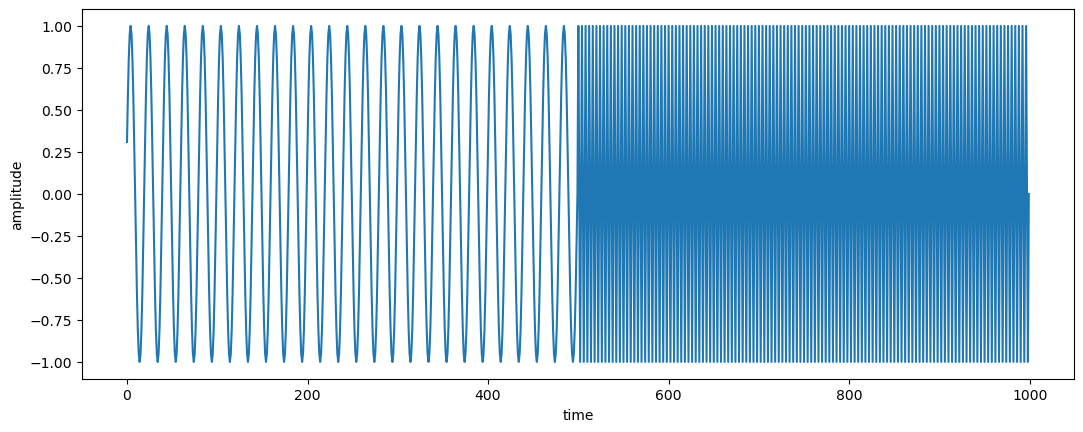

In [5]:
plt.figure(figsize=(2 * 6.4, 4.8))
plt.plot(x[0].cpu())
plt.ylabel('amplitude')
plt.xlabel('time');

torch.Size([1, 1000]) cpu torch.float32


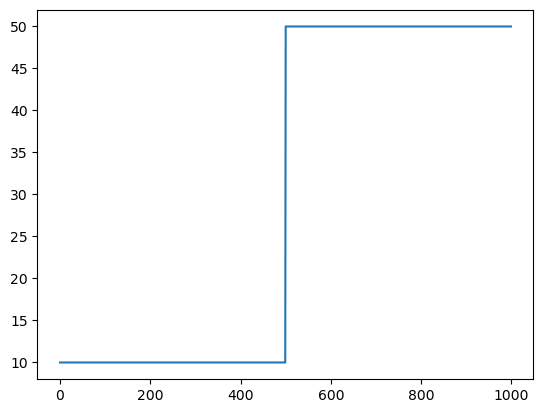

In [6]:
sr = 200
size = 500
f = torch.cat((10 * torch.ones(size), 50 * torch.ones(size)))
x = torch.sin(2 * pi * torch.cumsum(f, 0) / sr)  # + 0.05*torch.randn_like(f)
x = x[None, :].to(device)
print(x.shape, x.device, x.dtype)
plt.figure()
plt.plot(f)

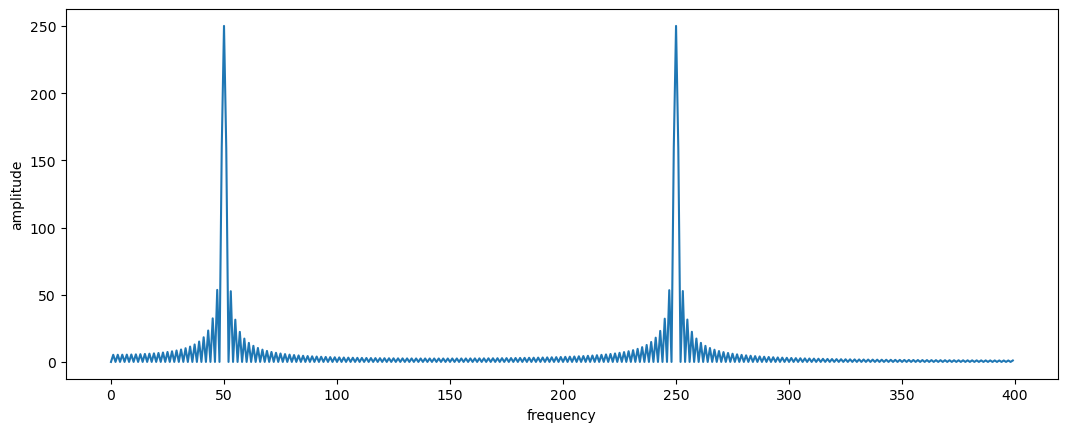

In [7]:
plt.figure(figsize=(2 * 6.4, 4.8))
plt.plot(torch.fft.rfft(x[0]).abs().cpu()[:400])
plt.ylabel('amplitude')
plt.xlabel('frequency');

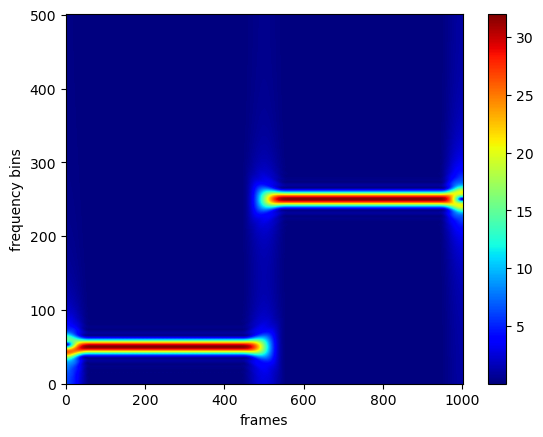

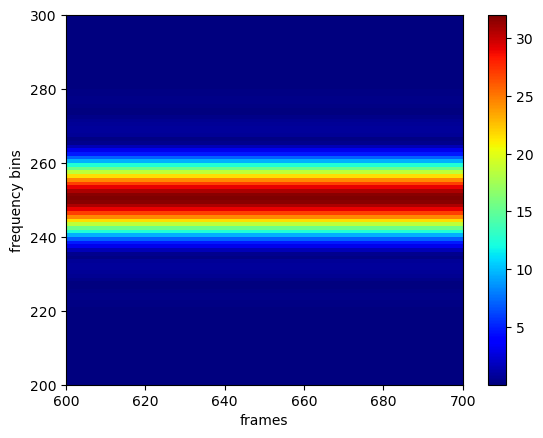

In [8]:
spec = torchaudio.transforms.Spectrogram(
    n_fft=1000, win_length=128, hop_length=1
)(x.cpu())
ax = plt.subplot()
im = ax.imshow(
    spec[0].pow(0.5).cpu(),
    aspect='auto',
    origin='lower',
    cmap='jet',
    extent=[0, spec.shape[-1], 0, spec.shape[-2]],
)
plt.colorbar(im, ax=ax)
plt.ylabel('frequency bins')
plt.xlabel('frames')

plt.figure()
ax = plt.subplot()
im = ax.imshow(
    spec[0, 200:300, 600:700].cpu().pow(0.5),
    aspect='auto',
    origin='lower',
    cmap='jet',
    extent=[600, 700, 200, 300],
)
plt.colorbar(im, ax=ax)
plt.ylabel('frequency bins')
plt.xlabel('frames');

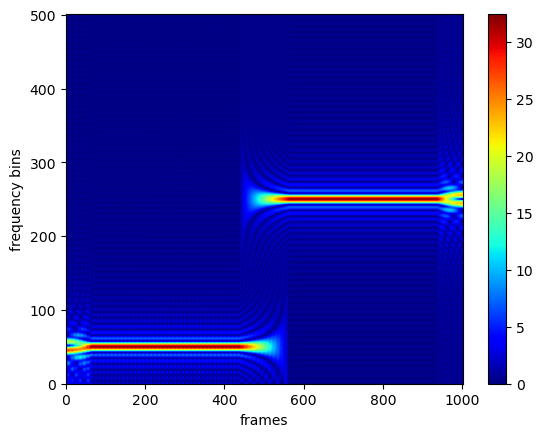

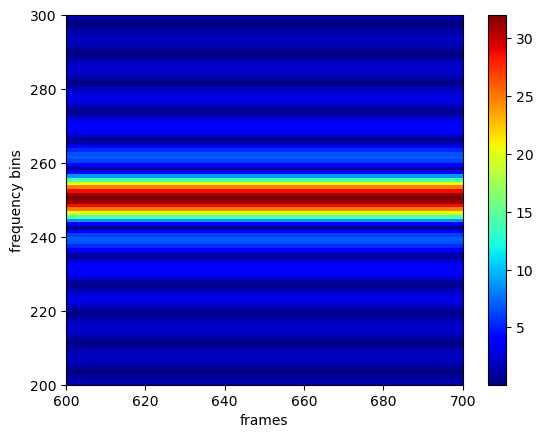

In [9]:
window_fn = lambda t: torch.ones(t) / 2
spec = torchaudio.transforms.Spectrogram(
    n_fft=1000, win_length=128, hop_length=1, window_fn=window_fn
)(x.cpu())
ax = plt.subplot()
im = ax.imshow(
    spec[0].cpu().pow(0.5),
    aspect='auto',
    origin='lower',
    cmap='jet',
    extent=[0, spec.shape[-1], 0, spec.shape[-2]],
)
plt.colorbar(im, ax=ax)
plt.ylabel('frequency bins')
plt.xlabel('frames')

plt.figure()
ax = plt.subplot()
im = ax.imshow(
    spec[0, 200:300, 600:700].cpu().pow(0.5),
    aspect='auto',
    origin='lower',
    cmap='jet',
    extent=[600, 700, 200, 300],
)
plt.colorbar(im, ax=ax)
plt.ylabel('frequency bins')
plt.xlabel('frames');

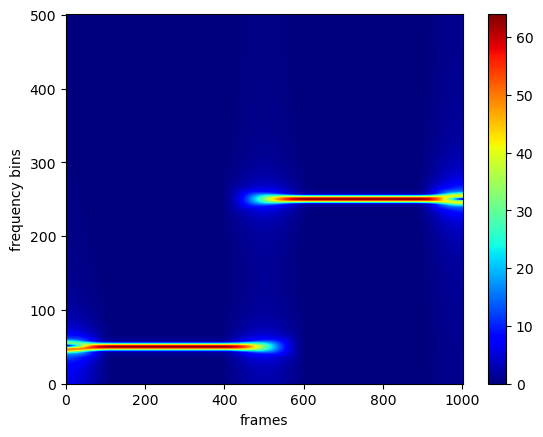

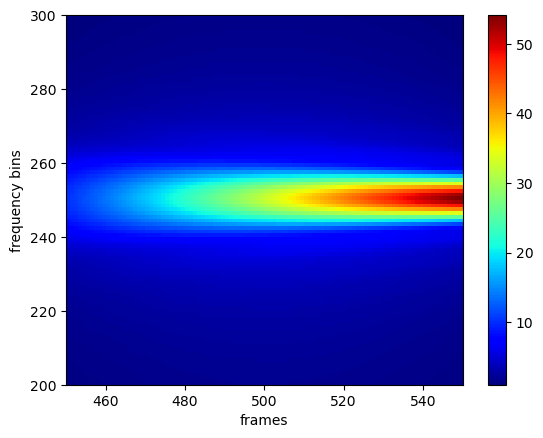

In [10]:
spec = torchaudio.transforms.Spectrogram(
    n_fft=1000, win_length=256, hop_length=1
)(x.cpu())
ax = plt.subplot()
im = ax.imshow(
    spec[0].cpu().pow(0.5),
    aspect='auto',
    origin='lower',
    cmap='jet',
    extent=[0, spec.shape[-1], 0, spec.shape[-2]],
)
plt.colorbar(im, ax=ax)
plt.ylabel('frequency bins')
plt.xlabel('frames')

plt.figure()
ax = plt.subplot()
im = ax.imshow(
    spec[0, 200:300, 450:550].cpu().pow(0.5),
    aspect='auto',
    origin='lower',
    cmap='jet',
    extent=[450, 550, 200, 300],
)
plt.colorbar(im, ax=ax)
plt.ylabel('frequency bins')
plt.xlabel('frames');

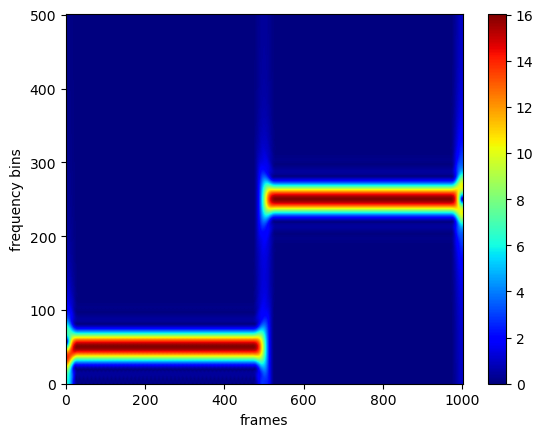

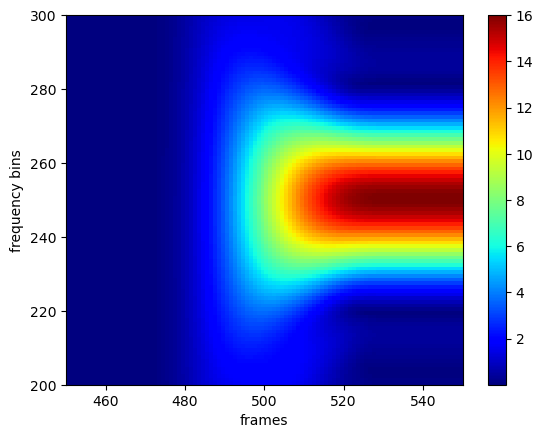

In [11]:
spec = torchaudio.transforms.Spectrogram(
    n_fft=1000, win_length=64, hop_length=1
)(x.cpu())
ax = plt.subplot()
im = ax.imshow(
    spec[0].cpu().pow(0.5),
    aspect='auto',
    origin='lower',
    cmap='jet',
    extent=[0, spec.shape[-1], 0, spec.shape[-2]],
)
plt.colorbar(im, ax=ax)
plt.ylabel('frequency bins')
plt.xlabel('frames')
plt.figure()
ax = plt.subplot()
im = ax.imshow(
    spec[0, 200:300, 450:550].cpu().pow(0.5),
    aspect='auto',
    origin='lower',
    cmap='jet',
    extent=[450, 550, 200, 300],
)
plt.colorbar(im, ax=ax)
plt.ylabel('frequency bins')
plt.xlabel('frames');

In [12]:
device

'cpu'